# Chemical Analysis Linear regression Model

In [1]:
# First we import the python libraries
%config inlineBackend.figure_format = 'svg'
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

## Next we need to read our data

In [2]:
df = pd.read_csv('./project-data/chemical_project_Data_Set.csv')
df.shape

(970663, 16)

In [3]:
df.head()

,Ag,Au,As,Ba,Ce,Co,Cr,Cu,La,Nb,Ni,Pb,Sr,V,Zn,Zr
0,0.2,0.07,165.0,489.0,44.0,18.0,144.0,58.0,15.0,15.0,63.0,12.0,310.0,131.0,90.0,131.0
1,3.9,12.12,2926.0,403.0,42.0,21.0,117.0,159.0,13.0,13.0,34.0,160.0,119.0,123.0,157.0,120.0
2,0.1,0.08,359.0,817.0,45.0,23.0,140.0,74.0,17.0,13.0,29.0,19.0,203.0,155.0,118.0,143.0
3,0.1,0.27,990.0,401.0,51.0,17.0,137.0,52.0,16.0,16.0,32.0,20.0,143.0,136.0,88.0,122.0
4,0.4,0.07,186.0,673.0,46.0,19.0,133.0,56.0,17.0,14.0,71.0,9.0,128.0,147.0,103.0,154.0


# Data Cleaning

In [4]:
df.tail()

,Ag,Au,As,Ba,Ce,Co,Cr,Cu,La,Nb,Ni,Pb,Sr,V,Zn,Zr
970658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## We notic that there is so many null records need to be removed

In [185]:
# df_original = df_original[~df_original.isnull().all(axis=1)]
df.dropna(how='all',inplace=True)
df.shape

(11359, 16)

In [186]:
df.tail()

,Ag,Au,As,Ba,Ce,Co,Cr,Cu,La,Nb,Ni,Pb,Sr,V,Zn,Zr
11354,0.9,0.18,4063.0,119.0,2.0,24.0,51.0,50.0,4.0,10.0,34.0,12.0,186.0,337.0,94.0,49.0
11355,0.8,0.03,853.0,195.0,6.0,19.0,206.0,40.0,5.0,9.0,64.0,8.0,245.0,257.0,71.0,59.0
11356,0.8,0.04,340.0,96.0,7.0,24.0,270.0,30.0,3.0,9.0,43.0,6.0,211.0,328.0,82.0,46.0
11357,0.9,0.04,799.0,171.0,18.0,16.0,53.0,75.0,9.0,9.0,28.0,10.0,294.0,188.0,127.0,97.0
11358,0.7,0.02,81.0,178.0,14.0,21.0,66.0,61.0,7.0,9.0,34.0,7.0,283.0,258.0,104.0,64.0


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11359 entries, 0 to 11358
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ag      11359 non-null  float64
 1   Au      11359 non-null  float64
 2   As      11359 non-null  float64
 3   Ba      11359 non-null  float64
 4   Ce      9222 non-null   float64
 5   Co      10628 non-null  float64
 6   Cr      11359 non-null  float64
 7   Cu      11359 non-null  float64
 8   La      10441 non-null  float64
 9   Nb      11359 non-null  float64
 10  Ni      11359 non-null  float64
 11  Pb      11359 non-null  float64
 12  Sr      10079 non-null  float64
 13  V       10946 non-null  float64
 14  Zn      11359 non-null  float64
 15  Zr      11359 non-null  float64
dtypes: float64(16)
memory usage: 1.5 MB


## Here we need to isolate our infected data

In [188]:
df.isna().sum()

Ag       0
Au       0
As       0
Ba       0
Ce    2137
Co     731
Cr       0
Cu       0
La     918
Nb       0
Ni       0
Pb       0
Sr    1280
V      413
Zn       0
Zr       0
dtype: int64

In [189]:
df_isna = df[df.isna().any(axis=1)]
df_isna.shape

(2454, 16)

In [190]:
df_isna.head()

,Ag,Au,As,Ba,Ce,Co,Cr,Cu,La,Nb,Ni,Pb,Sr,V,Zn,Zr
102,0.5,0.02,5.5,96.85,NaN,26.60,121.30,61.91,3.56,12.95,20.18,12.0,NaN,243.31,48.31,11.57
103,0.5,0.02,5.5,177.63,NaN,25.20,110.34,66.80,3.23,12.38,20.92,9.0,NaN,224.98,47.08,11.00
104,0.5,0.02,5.5,244.48,NaN,28.09,117.70,80.41,3.74,12.65,21.56,33.0,NaN,241.81,56.11,11.24
105,0.5,0.02,5.5,193.49,NaN,28.29,97.39,61.93,4.09,12.93,21.57,10.0,NaN,247.03,55.77,11.05
106,0.5,0.02,5.5,269.79,NaN,29.96,72.33,120.71,2.51,11.40,24.56,45.0,NaN,230.14,50.40,9.30


In [191]:
df = df.dropna()
df.shape

(8905, 16)

In [192]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ag,8905.0,1.881305,9.685160,-1.00,1.00,1.00,1.00,327.73
Au,8905.0,0.253717,3.055686,0.01,0.02,0.02,0.02,141.00
As,8905.0,255.943444,1290.903821,-50.00,5.50,5.50,12.29,34670.00
Ba,8905.0,470.291194,377.630827,0.00,177.10,446.69,691.63,11020.92
Ce,8905.0,127.116402,695.992562,-10.00,21.27,28.21,70.72,54043.24
Co,8905.0,10.774421,13.489683,-5.00,3.21,6.34,12.84,346.15
Cr,8905.0,42.493032,97.547855,-10.00,6.96,17.49,32.71,2345.19
Cu,8905.0,452.202321,1736.466575,0.50,11.86,55.87,576.23,128000.00
La,8905.0,58.257595,374.635608,-20.00,11.45,14.42,27.64,31867.43
Nb,8905.0,165.028888,614.603167,-20.00,10.00,12.79,28.96,15028.57


## Now we need to isolate rows with negative values

In [193]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ag,8905.0,1.881305,9.685160,-1.00,1.00,1.00,1.00,327.73
Au,8905.0,0.253717,3.055686,0.01,0.02,0.02,0.02,141.00
As,8905.0,255.943444,1290.903821,-50.00,5.50,5.50,12.29,34670.00
Ba,8905.0,470.291194,377.630827,0.00,177.10,446.69,691.63,11020.92
Ce,8905.0,127.116402,695.992562,-10.00,21.27,28.21,70.72,54043.24
Co,8905.0,10.774421,13.489683,-5.00,3.21,6.34,12.84,346.15
Cr,8905.0,42.493032,97.547855,-10.00,6.96,17.49,32.71,2345.19
Cu,8905.0,452.202321,1736.466575,0.50,11.86,55.87,576.23,128000.00
La,8905.0,58.257595,374.635608,-20.00,11.45,14.42,27.64,31867.43
Nb,8905.0,165.028888,614.603167,-20.00,10.00,12.79,28.96,15028.57


In [194]:
for column_Name in df.columns:
    df.loc[(df[column_Name] < 0), column_Name] = np.NaN

df.shape

(8905, 16)

In [195]:
df.isna().sum()

Ag    70
Au     0
As    42
Ba     0
Ce     3
Co    15
Cr    64
Cu     0
La    66
Nb    78
Ni    31
Pb    30
Sr     0
V      0
Zn     0
Zr    84
dtype: int64

In [196]:
df_isna2 = df[df.isna().any(axis=1)]
df_isna2.shape

df_isna = df_isna.append(df_isna2)
df.dropna(inplace=True)

df_isna.shape

(2541, 16)

In [197]:
df_isna.head()

,Ag,Au,As,Ba,Ce,Co,Cr,Cu,La,Nb,Ni,Pb,Sr,V,Zn,Zr
102,0.5,0.02,5.5,96.85,NaN,26.60,121.30,61.91,3.56,12.95,20.18,12.0,NaN,243.31,48.31,11.57
103,0.5,0.02,5.5,177.63,NaN,25.20,110.34,66.80,3.23,12.38,20.92,9.0,NaN,224.98,47.08,11.00
104,0.5,0.02,5.5,244.48,NaN,28.09,117.70,80.41,3.74,12.65,21.56,33.0,NaN,241.81,56.11,11.24
105,0.5,0.02,5.5,193.49,NaN,28.29,97.39,61.93,4.09,12.93,21.57,10.0,NaN,247.03,55.77,11.05
106,0.5,0.02,5.5,269.79,NaN,29.96,72.33,120.71,2.51,11.40,24.56,45.0,NaN,230.14,50.40,9.30


In [198]:
df.shape

(8818, 16)

In [199]:
df.head()

,Ag,Au,As,Ba,Ce,Co,Cr,Cu,La,Nb,Ni,Pb,Sr,V,Zn,Zr
0,0.2,0.07,165.0,489.0,44.0,18.0,144.0,58.0,15.0,15.0,63.0,12.0,310.0,131.0,90.0,131.0
1,3.9,12.12,2926.0,403.0,42.0,21.0,117.0,159.0,13.0,13.0,34.0,160.0,119.0,123.0,157.0,120.0
2,0.1,0.08,359.0,817.0,45.0,23.0,140.0,74.0,17.0,13.0,29.0,19.0,203.0,155.0,118.0,143.0
3,0.1,0.27,990.0,401.0,51.0,17.0,137.0,52.0,16.0,16.0,32.0,20.0,143.0,136.0,88.0,122.0
4,0.4,0.07,186.0,673.0,46.0,19.0,133.0,56.0,17.0,14.0,71.0,9.0,128.0,147.0,103.0,154.0


In [200]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5290, 15), (3528, 15), (5290,), (3528,))

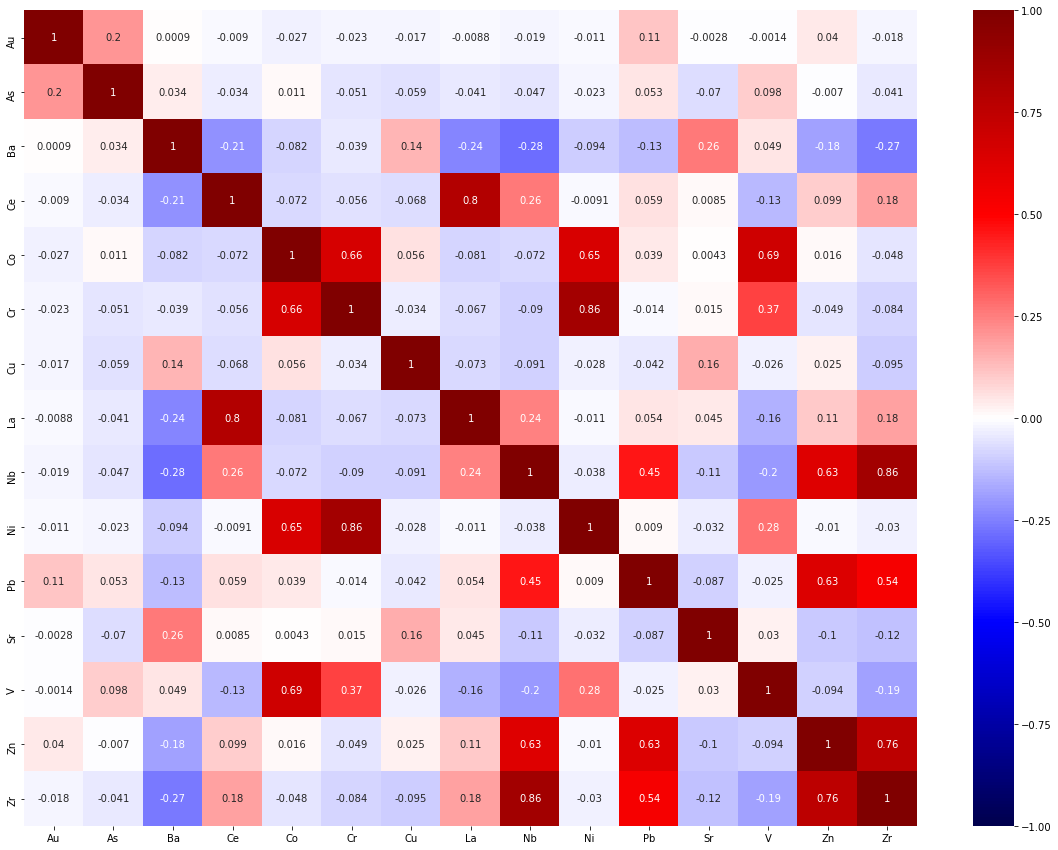

In [201]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(X_train.corr(),cmap='seismic', annot=True, vmin=-1, vmax=1, ax=ax);

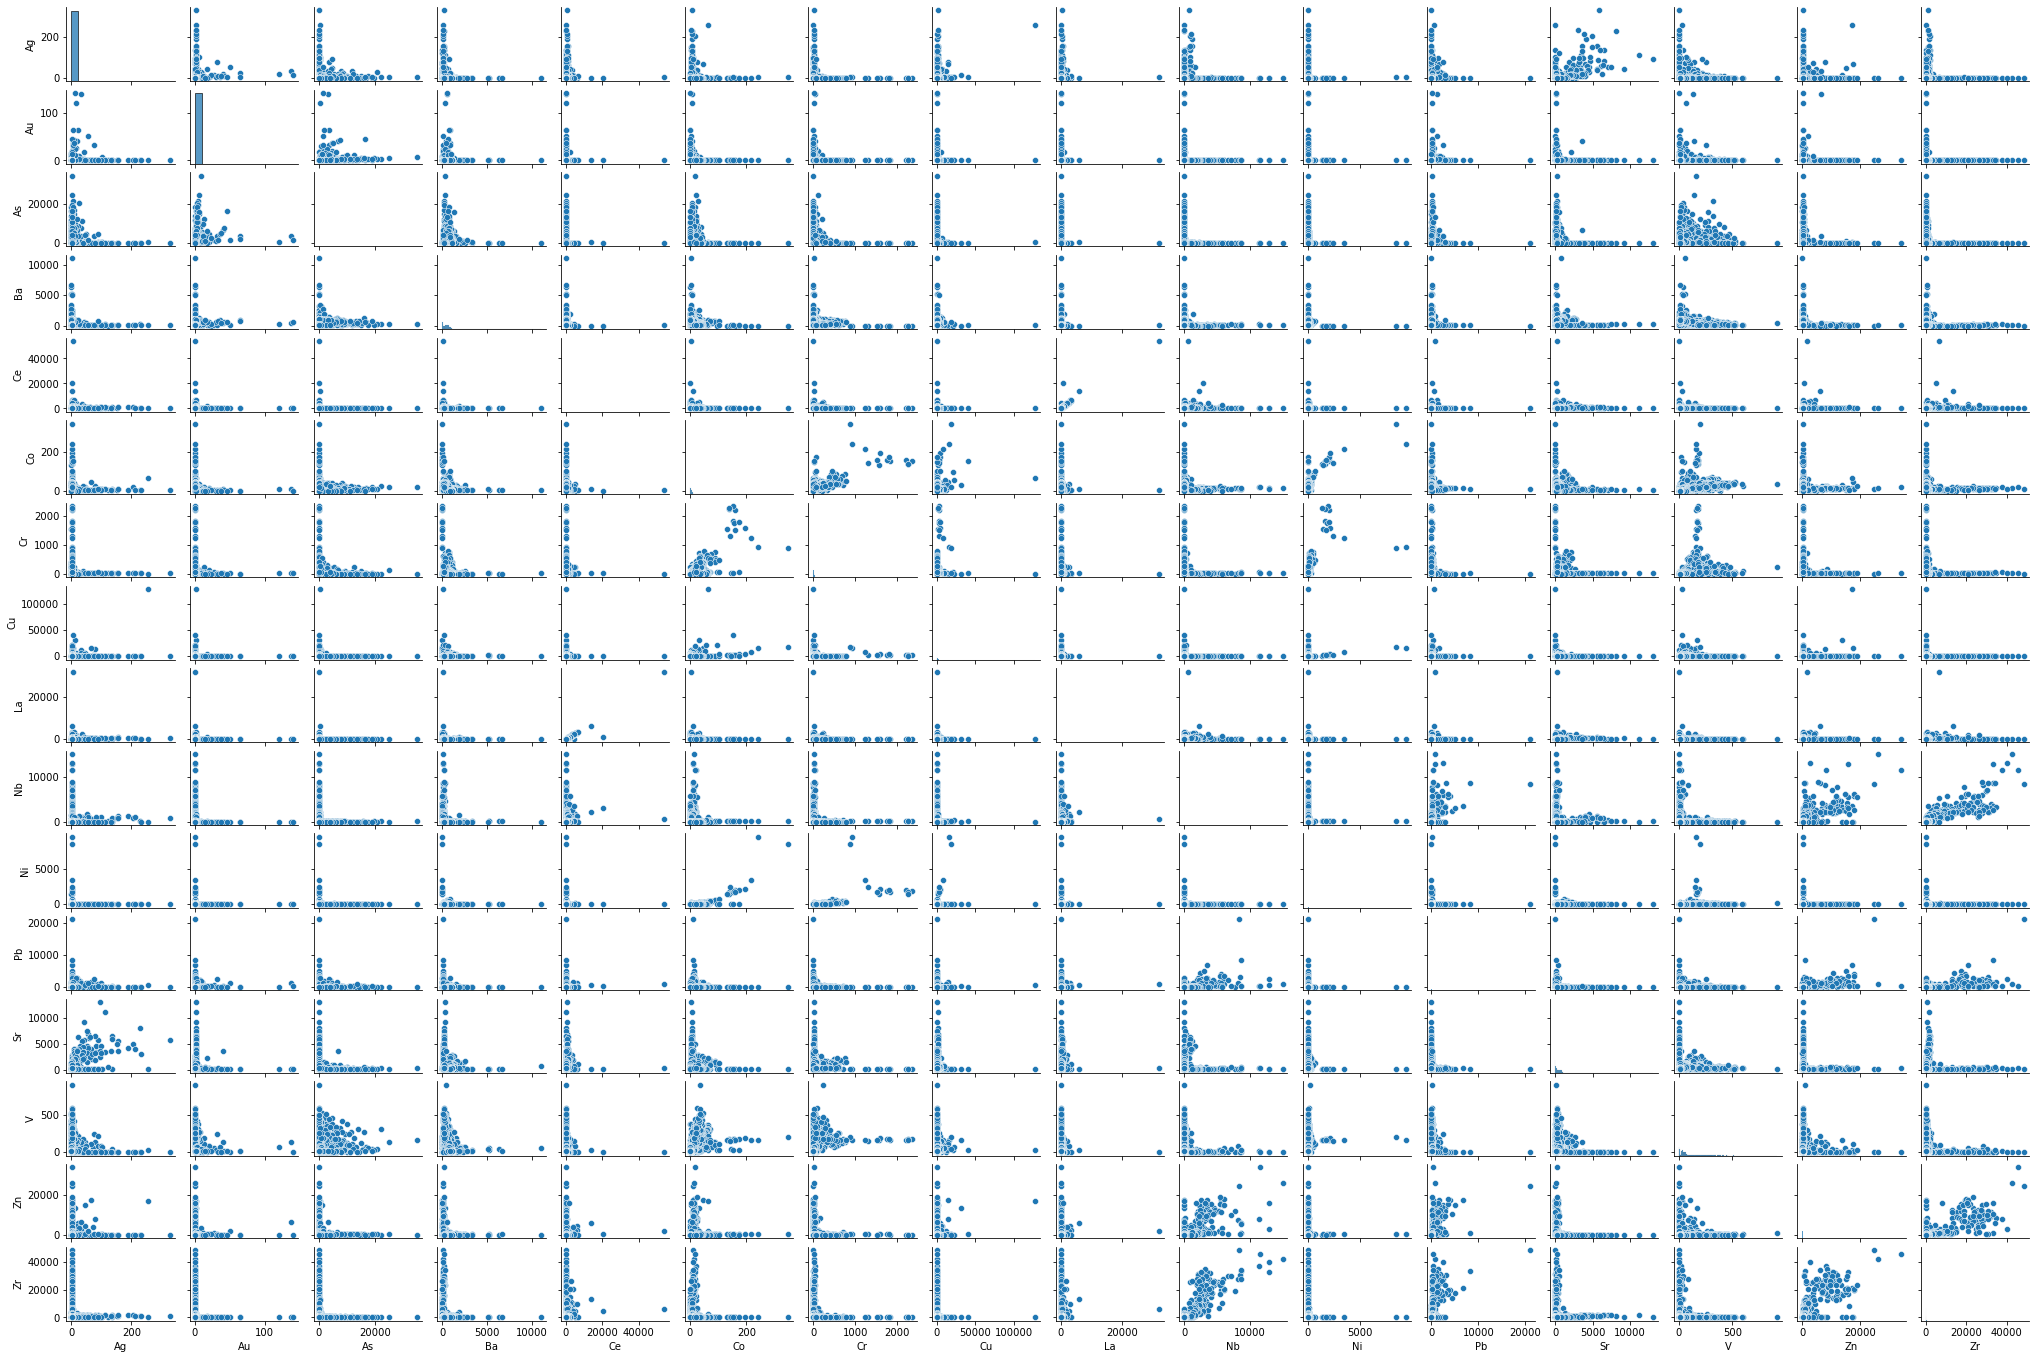

In [215]:
sns.pairplot(df,height=1.2,aspect=1.5)

In [206]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

w = np.concatenate([lr.coef_, lr.intercept_[None]], axis = 0)

w

array([ 2.15186316e-01,  4.26154893e-04, -6.04470260e-03, -3.41076695e-04,
        1.64140399e-02, -9.71824059e-03, -5.02755013e-05,  2.76581844e-03,
        1.12723450e-03,  7.10592775e-03,  6.68163174e-03,  1.06375728e-02,
       -9.00287774e-03, -4.63967140e-05, -4.72080431e-04,  5.62763334e-01])

In [207]:
lr.score(X_train, y_train)

0.33593745112061724

In [208]:
lr.score(X_test, y_test)

0.18961935969137578

In [209]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [210]:
#Comparing the actual value with predicted values

y_actual_train = y_train
y_predicted_train = lr.predict(X_train)
y_predicted_train.shape

sqrt(mean_squared_error(y_actual_train, y_predicted_train))

8.282706826879938

In [211]:
#Comparing the actual value with predicted values in the test set

y_actual_test = y_test
y_predicted_test = lr.predict(X_test)
y_predicted_test.shape

sqrt(mean_squared_error(y_actual_test, y_predicted_test))

8.133453322610116

In [212]:
y_actual_test.head()

8385    1.0
5709    1.0
4827    1.0
7987    1.0
3429    1.0
Name: Ag, dtype: float64

In [213]:
y_predicted_test

array([-4.07820949,  0.56709484, -0.29177144, ...,  0.83873161,
       -0.49831239, -4.8580149 ])